In [1]:
import cowsay

cowsay.turtle('From here our process jumps into next process: The validation route. Here we use database in 2015, try to test and see whether our model built from 2007-2014 is good enough to simulate 2015 user data.')

  _________________________________________________
 /                                                 \
| From here our process jumps into next process: Th |
| e validation route. Here we use database in 2015, |
|  try to test and see whether our model built from |
|  2007-2014 is good enough to simulate 2015 user d |
| ata.                                              |
 \                                                 /
                                                   \
                                                    \
                                                     \
                                                      \
                                                                                 ___-------___
                                                                             _-~~             ~~-_
                                                                          _-~                    /~-_
                                                        /^

# Import Libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


import warnings
warnings.filterwarnings('ignore')

# Loading the Data

### Import Data

In [3]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header = None, skiprows = 1)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0, header = None, skiprows = 1)

In [4]:
# We are given the new data, loan_data_2015
# Now it is time to calculate and compare whether our model can still keep up the accuracy with new data./

loan_data_backup = pd.read_csv('loan_data_2015.csv')

loan_data = loan_data_backup.copy()
pd.options.display.max_columns = None

### Explore Data

In [5]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,68444620,73334399,35000,35000,35000.0,60 months,11.99,778.38,C,C1,Foreign Service Officer,10+ years,MORTGAGE,128000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,Home improvement,200xx,DC,6.46,0.0,Feb-90,0.0,46.0,NaN,17.0,0.0,14277,27.4,46.0,w,35000.0,35000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,56.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,321.0,146867.0,1.0,11.0,0.0,0.0,28.0,35367.0,49.3,0.0,1.0,5020.0,40.1,52200.0,1.0,4.0,0.0
1,68547583,73437441,8650,8650,8650.0,36 months,5.32,260.50,A,A1,Associate Consultant,< 1 year,MORTGAGE,100000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,462xx,IN,7.28,0.0,Jul-01,0.0,NaN,NaN,15.0,0.0,7158,26.7,24.0,w,8650.0,8650.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,165450.0,0.0,1.0,1.0,1.0,11.0,24041.0,88.8,0.0,3.0,3081.0,57.9,26800.0,1.0,0.0,5.0
2,67849662,72708407,4225,4225,4225.0,36 months,14.85,146.16,C,C5,mechanic,5 years,RENT,35000.0,Source Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,672xx,KS,15.22,2.0,Jul-11,0.0,18.0,NaN,6.0,0.0,1058,24.6,6.0,w,4225.0,4225.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4888.0,0.0,1.0,0.0,0.0,47.0,3830.0,21.9,0.0,0.0,367.0,22.4,4300.0,0.0,0.0,0.0
3,68506885,73396712,10000,10000,10000.0,60 months,11.99,222.40,C,C1,CARDIOVASCULAR TECH,10+ years,RENT,42500.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,460xx,IN,31.04,0.0,Dec-98,1.0,NaN,NaN,10.0,0.0,5812,40.9,23.0,w,10000.0,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,41166.0,1.0,3.0,0.0,2.0,13.0,35354.0,75.5,1.0,1.0,3118.0,67.4,14200.0,1.0,1.0,1.0
4,68341763,72928789,20000,20000,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-15,Issued,n,https://www.lendingclub.com/browse/loanDetail....,NaN,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-00,0.0,NaN,NaN,6.0,0.0,7869,56.2,18.0,w,20000.0,20000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,Jan-16,Dec-15,0.0,NaN,1,JOINT,71000.0,13.85,Not Verified,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,72.8,0.0,2.0,2081.0,64.7,14000.0,2.0,5.0,1.0


In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  float64
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

# Population Stability Index: Preprocessing

### >>> We do the preprocess steps just the way we did in P1 notebook file >>>

### >>> That means Ctrl + C & Ctrl + V

In [7]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year', '')
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])
loan_data['emp_length_int'].fillna(value = 0, inplace = True)




loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])




loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']
loan_data['mnths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date','mnths_since_earliest_cr_line']][loan_data['mnths_since_earliest_cr_line'] < 0]
loan_data['mnths_since_earliest_cr_line'][loan_data['mnths_since_earliest_cr_line'] < 0] = loan_data['mnths_since_earliest_cr_line'].max()




loan_data['issue_d_date'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y')
loan_data['mnths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d_date'])/ np.timedelta64(1, 'M')))

In [8]:
pd.get_dummies(loan_data['grade'], prefix = 'grade',prefix_sep = ':')

loan_data_dummies = [pd.get_dummies(loan_data['grade'], prefix = 'grade',prefix_sep = ':'),
                     pd.get_dummies(loan_data['sub_grade'], prefix = 'sub_grade',prefix_sep = ':'),
                     pd.get_dummies(loan_data['home_ownership'], prefix = 'home_ownership',prefix_sep = ':'),
                     pd.get_dummies(loan_data['verification_status'], prefix = 'verification_status',prefix_sep = ':'),
                     pd.get_dummies(loan_data['loan_status'], prefix = 'loan_status',prefix_sep = ':'),
                     pd.get_dummies(loan_data['purpose'], prefix = 'purpose',prefix_sep = ':'),
                     pd.get_dummies(loan_data['addr_state'], prefix = 'addr_state',prefix_sep = ':'),
                     pd.get_dummies(loan_data['initial_list_status'], prefix = 'initial_list_status',prefix_sep = ':')]

loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)
loan_data = pd.concat([loan_data, loan_data_dummies],axis =1)

In [9]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace = True)
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace = True)


loan_data['mnths_since_earliest_cr_line'].fillna(0, inplace = True)
loan_data['acc_now_delinq'].fillna(0, inplace = True)
loan_data['total_acc'].fillna(0, inplace = True)
loan_data['pub_rec'].fillna(0, inplace = True)
loan_data['open_acc'].fillna(0, inplace = True)
loan_data['inq_last_6mths'].fillna(0, inplace = True)
loan_data['delinq_2yrs'].fillna(0, inplace = True)
loan_data['emp_length_int'].fillna(0, inplace = True)

In [10]:
loan_data['loan_status'].value_counts()

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [11]:
# See the percentage %% of categories
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current               0.896600
Fully Paid            0.054582
Issued                0.020091
Late (31-120 days)    0.011140
In Grace Period       0.007378
Charged Off           0.006585
Late (16-30 days)     0.002705
Default               0.000919
Name: loan_status, dtype: float64

In [12]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off',
                                                                'Default', 
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (31-120 days)']), 
                                                                0,1)


In [13]:
df_inputs_prepr = loan_data.drop('good_bad', axis = 1)
df_targets_prepr = loan_data['good_bad']

In [14]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1) 
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good'] 
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df



def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                 df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1) 
    df = df.iloc[:, [0, 1, 3]] 
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good'] 
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum() 
    df['n_good'] = df['prop_good'] * df['n_obs'] 
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs'] 
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum() 
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum() 
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad']) 
    ################# Continuous Variable we want them in Ascending/Descending Order, no need to sort them ############
    # df = df.sort_values(['WoE']) # Sort WoE
    # df = df.reset_index(drop = True) # Reset Index
    ################# And thus no index reset needed# #################################################################
    df['diff_prop_good'] = df['prop_good'].diff().abs() 
    df['diff_WoE'] = df['WoE'].diff().abs() 
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE'] 
    df['IV'] = df['IV'].sum() 
    return df





def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize = (18,6))
    plt.plot(x,y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

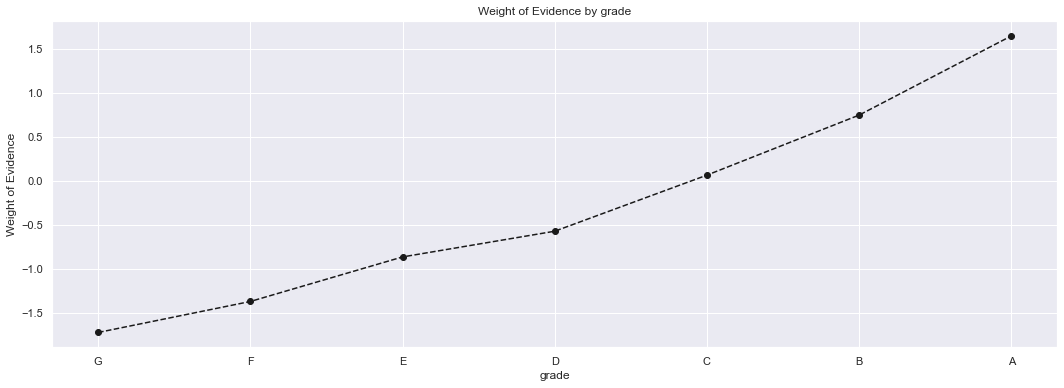

In [15]:
df_grade = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)

plot_by_woe(df_grade,0)

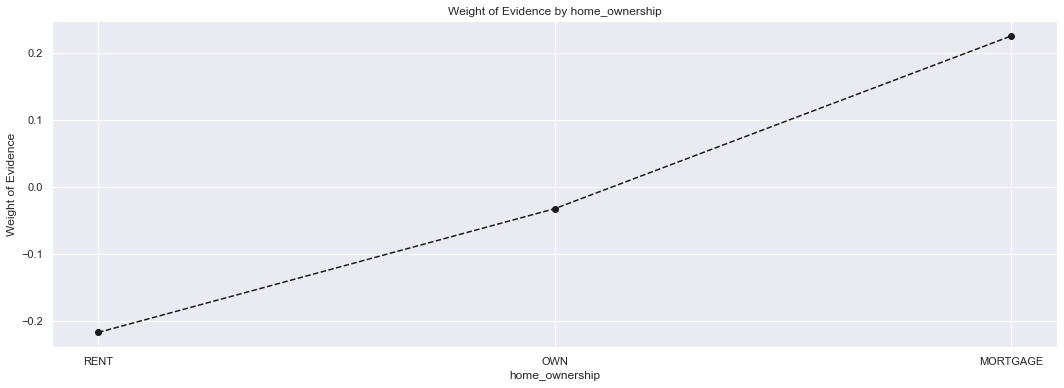

In [16]:
df_ownership = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)

plot_by_woe(df_ownership)

In [17]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],
                                                             df_inputs_prepr['home_ownership:ANY']])

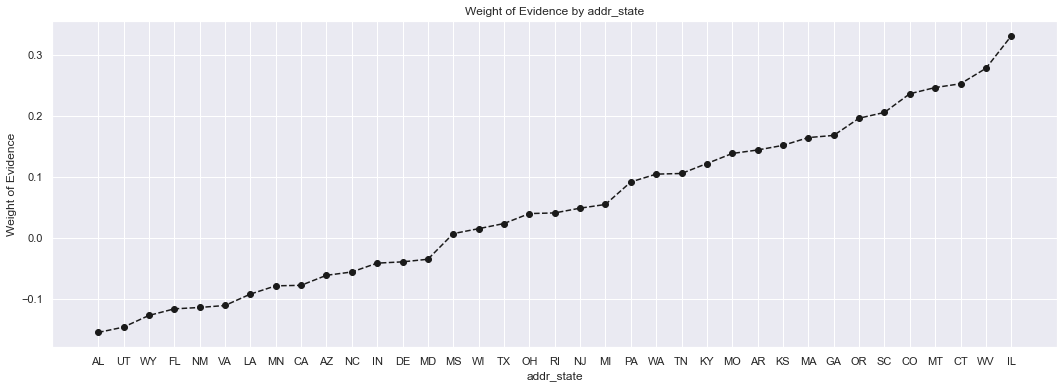

In [18]:
df_addr = woe_discrete(df_inputs_prepr, 'addr_state',df_targets_prepr)

if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

if ['addr_state:ID'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ID'] = 0
    
if ['addr_state:IA'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:IA'] = 0
    
    
    
plot_by_woe(df_addr.iloc[6:-6,:])   

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'],
                                                         df_inputs_prepr['addr_state:NE'],
                                                         df_inputs_prepr['addr_state:IA'],
                                                         df_inputs_prepr['addr_state:NV'],
                                                         df_inputs_prepr['addr_state:FL'],
                                                         df_inputs_prepr['addr_state:HI'],
                                                         df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'],
                                          df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'],
                                                      df_inputs_prepr['addr_state:TN'],
                                                      df_inputs_prepr['addr_state:MO'],
                                                      df_inputs_prepr['addr_state:LA'],
                                                      df_inputs_prepr['addr_state:MD'],
                                                      df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'],
                                                df_inputs_prepr['addr_state:KY'],
                                                df_inputs_prepr['addr_state:AZ'],
                                                df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'],
                                                    df_inputs_prepr['addr_state:MI'],
                                                    df_inputs_prepr['addr_state:PA'],
                                                    df_inputs_prepr['addr_state:OH'],
                                                    df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'],
                                                    df_inputs_prepr['addr_state:MA'],
                                                    df_inputs_prepr['addr_state:DE'],
                                                    df_inputs_prepr['addr_state:SD'],
                                                    df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'],
                                              df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'],
                                          df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'],
                                          df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'],
                                                      df_inputs_prepr['addr_state:SC'],
                                                      df_inputs_prepr['addr_state:CO'],
                                                      df_inputs_prepr['addr_state:VT'],
                                                      df_inputs_prepr['addr_state:AK'],
                                                      df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'],
                                                      df_inputs_prepr['addr_state:NH'],
                                                      df_inputs_prepr['addr_state:WY'],
                                                      df_inputs_prepr['addr_state:DC'],
                                                      df_inputs_prepr['addr_state:ME'],
                                                      df_inputs_prepr['addr_state:ID']])

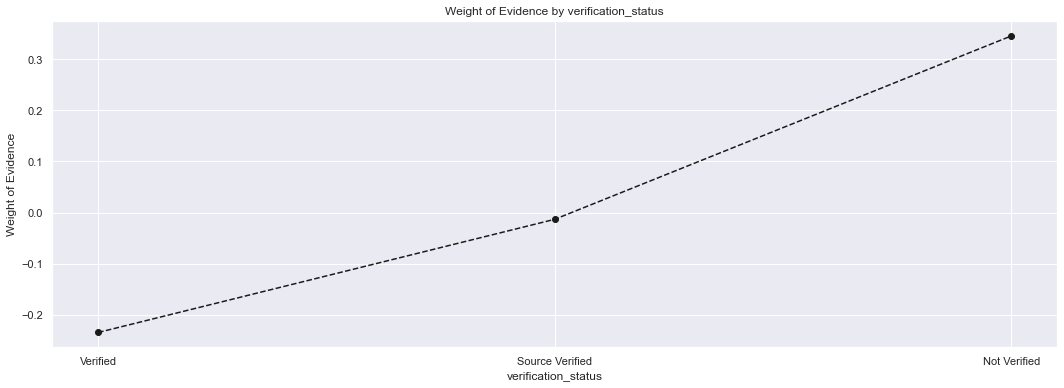

In [19]:
df_veri = woe_discrete(df_inputs_prepr, 'verification_status',df_targets_prepr)

plot_by_woe(df_veri)

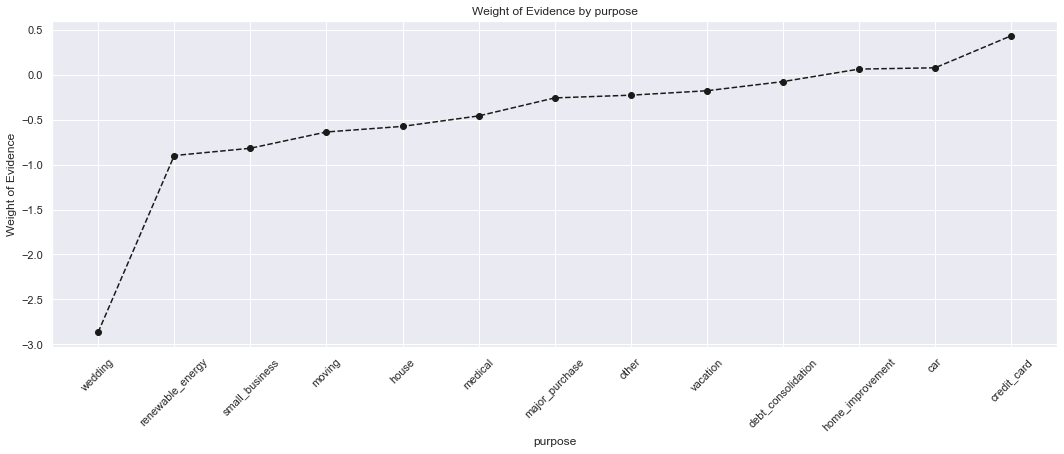

In [20]:
df_purpose = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)

plot_by_woe(df_purpose,45)

df_inputs_prepr['purpose:small_educ_moving'] = sum([df_inputs_prepr['purpose:small_business'],
                                                  df_inputs_prepr['purpose:educational'],
                                                  df_inputs_prepr['purpose:moving']])

df_inputs_prepr['purpose:house_other_renewable_medical'] = sum([df_inputs_prepr['purpose:house'],
                                                               df_inputs_prepr['purpose:other'],
                                                               df_inputs_prepr['purpose:renewable_energy'],
                                                               df_inputs_prepr['purpose:medical']])

df_inputs_prepr['purpose:wedding_vaca'] = sum([df_inputs_prepr['purpose:wedding'],
                                             df_inputs_prepr['purpose:vacation']])

df_inputs_prepr['purpose:improve_major_car'] = sum([df_inputs_prepr['purpose:home_improvement'],
                                                  df_inputs_prepr['purpose:major_purchase'],
                                                  df_inputs_prepr['purpose:car']])


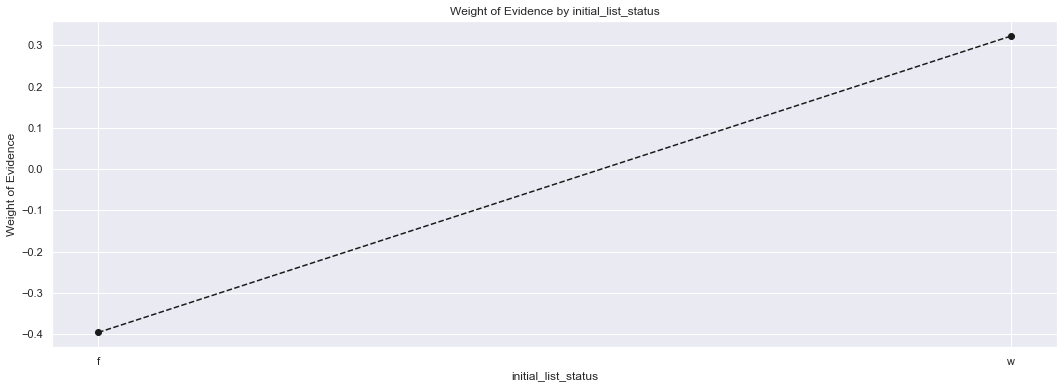

In [21]:
df_initial = woe_discrete(df_inputs_prepr, 'initial_list_status',df_targets_prepr)

plot_by_woe(df_initial)

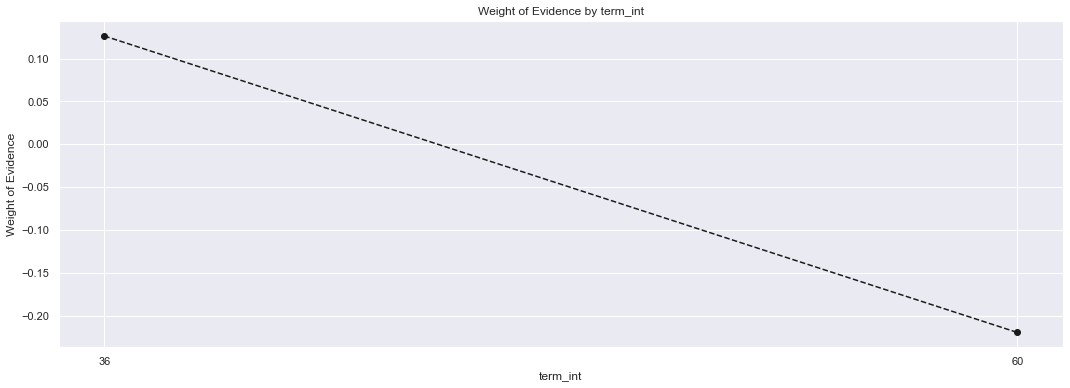

In [22]:
df_term = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)

plot_by_woe(df_term)


df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

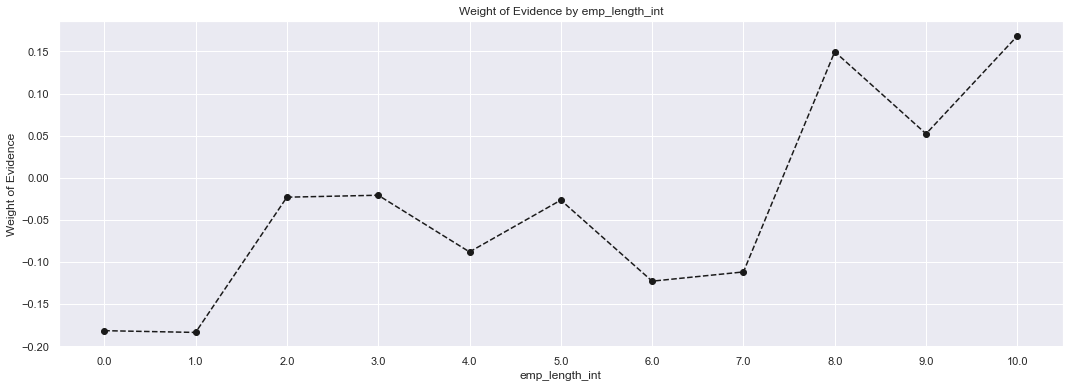

In [23]:
# see and process employment length variable

df_length = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)

plot_by_woe(df_length)

df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2,5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5,7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7,10)), 1, 0)
df_inputs_prepr['emp_length:10+'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

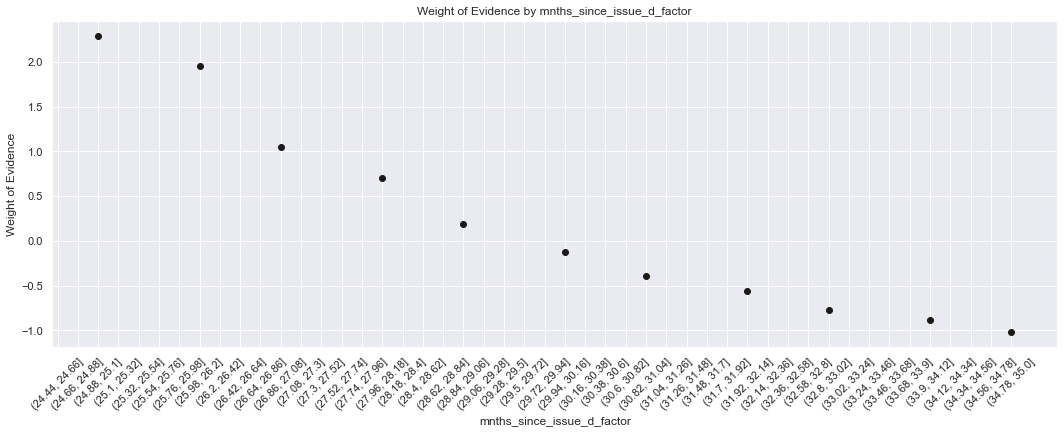

In [24]:
df_inputs_prepr['mnths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mnths_since_issue_d'], 50)
df_mnth = woe_ordered_continuous(df_inputs_prepr, 'mnths_since_issue_d_factor', df_targets_prepr)

plot_by_woe(df_mnth, 45)

df_inputs_prepr['mnths_since_issue_d: < 38'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(38)),1,0)
df_inputs_prepr['mnths_since_issue_d: 38~39'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(38,40)),1,0)
df_inputs_prepr['mnths_since_issue_d: 40~41'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(40,42)),1,0)
df_inputs_prepr['mnths_since_issue_d: 42~48'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(42,49)),1,0)
df_inputs_prepr['mnths_since_issue_d: 49~52'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(49,53)),1,0)
df_inputs_prepr['mnths_since_issue_d: 53~64'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(53,65)),1,0)
df_inputs_prepr['mnths_since_issue_d: 65~84'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(65,85)),1,0)
df_inputs_prepr['mnths_since_issue_d: > 84'] = np.where(df_inputs_prepr['mnths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mnths_since_issue_d'].max()))),1,0)

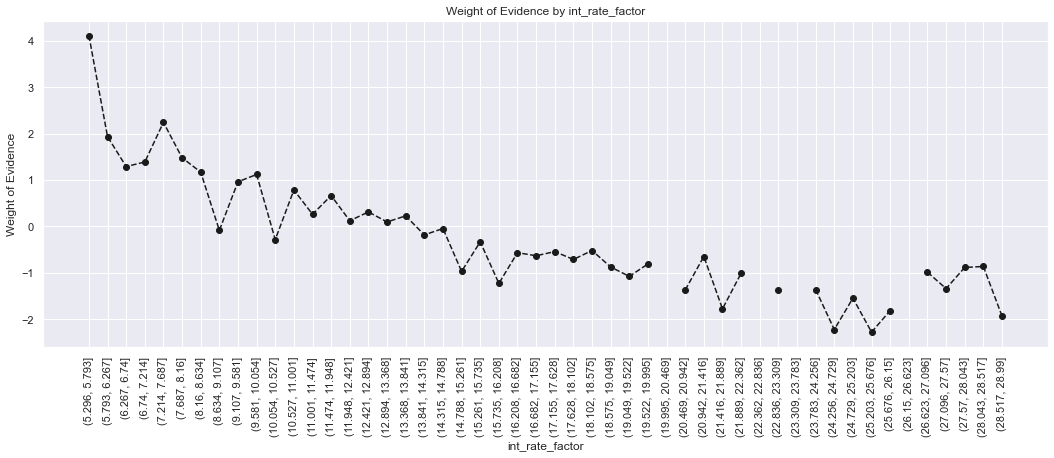

In [25]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)
df_rate = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)

plot_by_woe(df_rate, 90)

df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

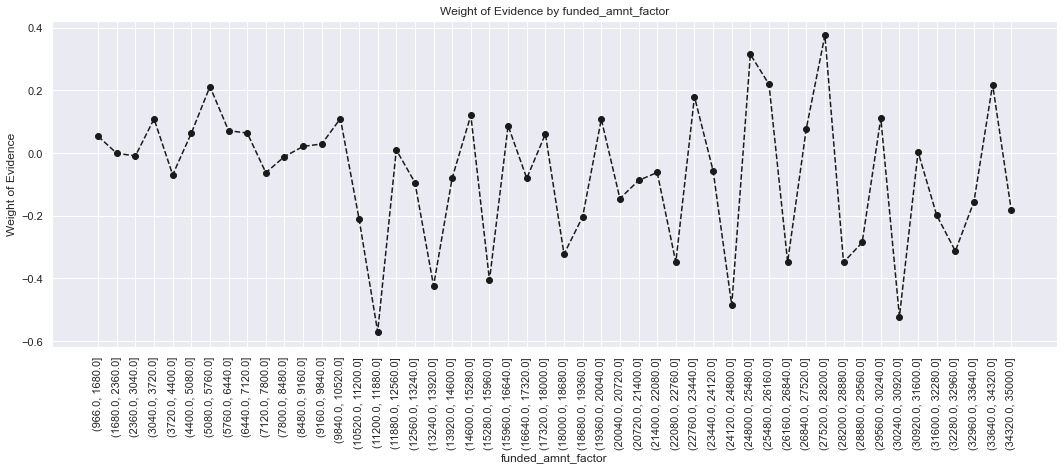

In [26]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'],50)
df_funded = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)

plot_by_woe(df_funded,90)

Not good enough for observation.

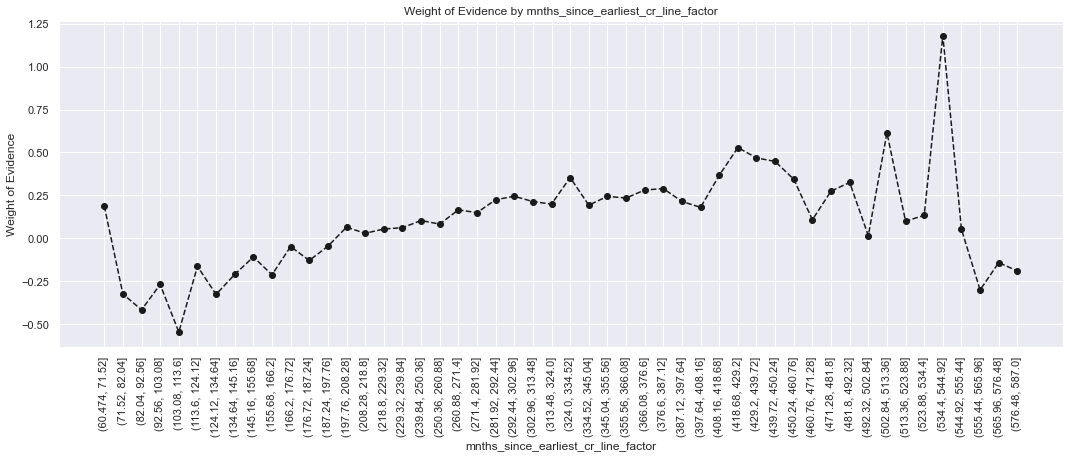

In [27]:
df_inputs_prepr['mnths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mnths_since_earliest_cr_line'],50)
df_earliest = woe_ordered_continuous(df_inputs_prepr, 'mnths_since_earliest_cr_line_factor', df_targets_prepr)

plot_by_woe(df_earliest,90)

df_inputs_prepr['mnths_since_earliest_cr_line:<164.36'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] <= 164.36), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:164.36-246.54'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 164.36) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 246.54), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:264.54-270.72'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 264.54) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 270.72), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:270.72-352.2'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 270.72) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 352.2), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:352.2-399.16'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 352.2) & (df_inputs_prepr['mnths_since_earliest_cr_line'] <= 399.16), 1, 0)
df_inputs_prepr['mnths_since_earliest_cr_line:>399.16'] = np.where((df_inputs_prepr['mnths_since_earliest_cr_line'] > 399.16), 1, 0)


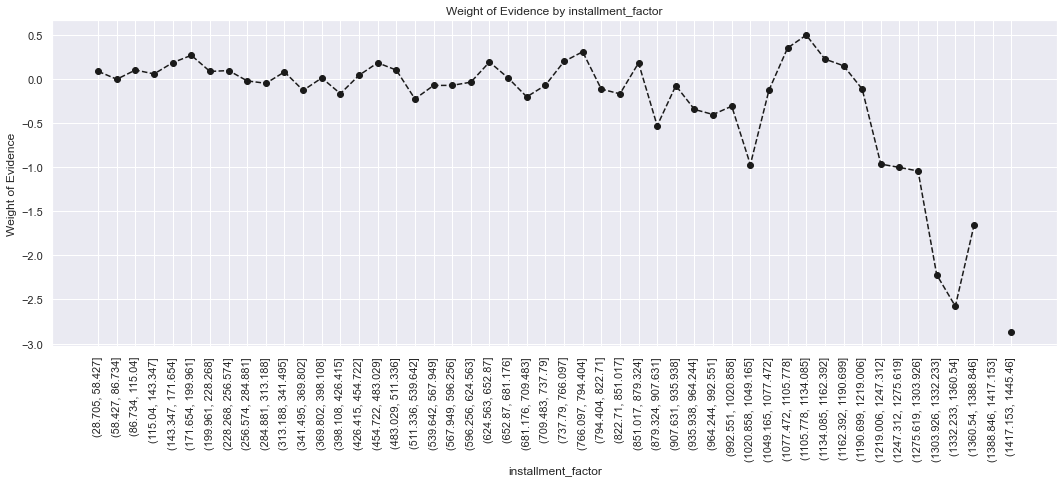

In [28]:
# installment

df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)
df_install = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

plot_by_woe(df_install,90)


Not good enough for observation.

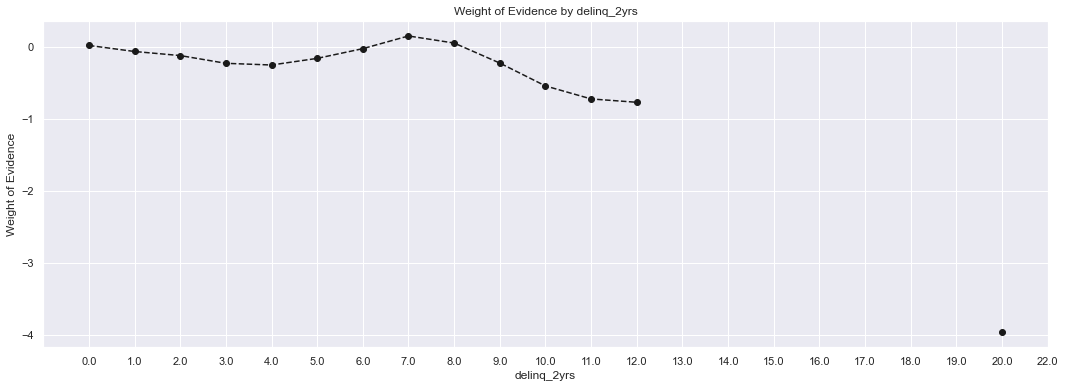

In [29]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)

plot_by_woe(df_temp)

df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

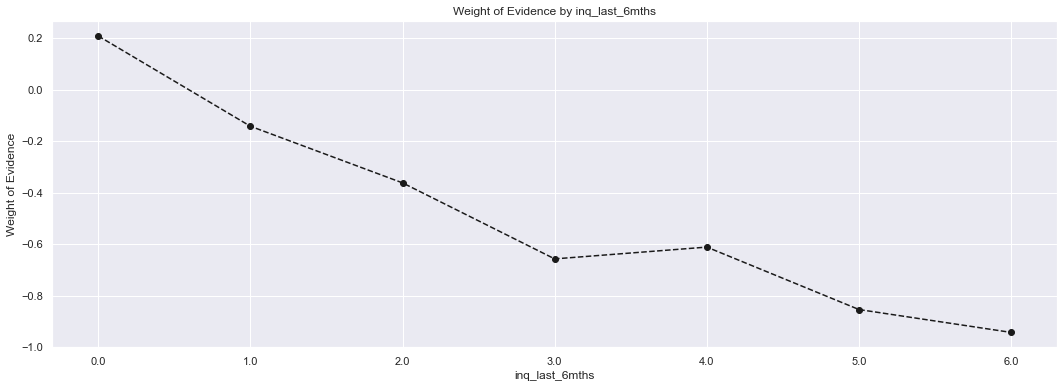

In [30]:
df_last_6mths = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)

plot_by_woe(df_last_6mths)

df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

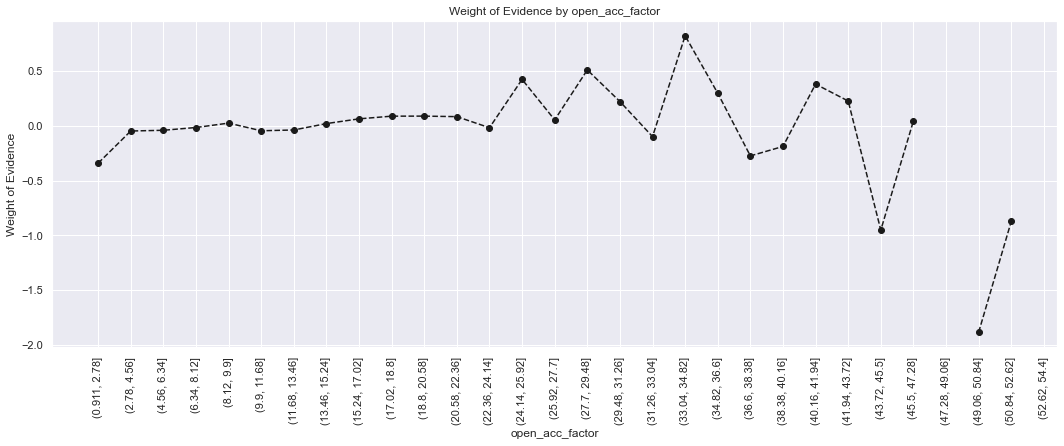

In [31]:
df_inputs_prepr['open_acc_factor'] = pd.cut(df_inputs_prepr['open_acc'],50)
df_open_acc = woe_ordered_continuous(df_inputs_prepr, 'open_acc_factor', df_targets_prepr)

plot_by_woe(df_open_acc,90)

df_inputs_prepr['open_acc:<5.04'] = np.where((df_inputs_prepr['open_acc'] <= 5.04), 1, 0)
df_inputs_prepr['open_acc:5.04-15.12'] = np.where((df_inputs_prepr['open_acc'] > 5.04) & (df_inputs_prepr['open_acc'] <= 15.12), 1, 0)
df_inputs_prepr['open_acc:15.12-23.52'] = np.where((df_inputs_prepr['open_acc'] > 15.12) & (df_inputs_prepr['open_acc'] <= 23.52), 1, 0)
df_inputs_prepr['open_acc:>23.52'] = np.where((df_inputs_prepr['open_acc'] > 23.52), 1, 0)

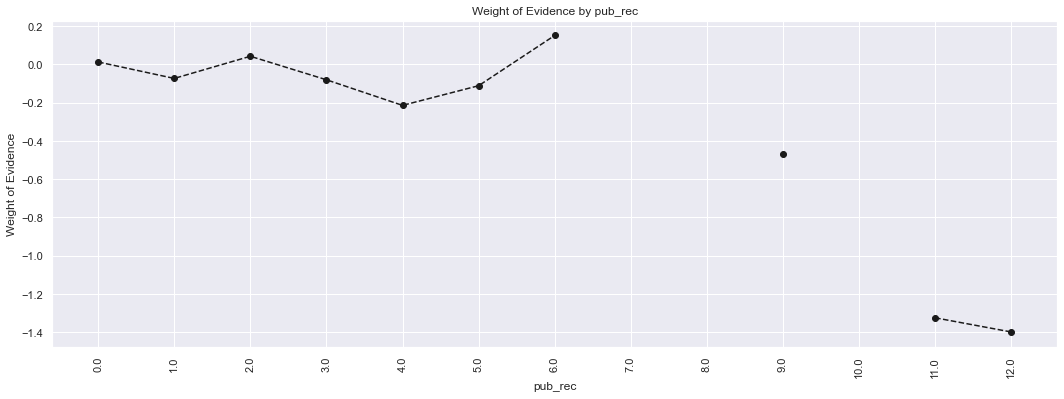

In [32]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)

plot_by_woe(df_temp, 90)

df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

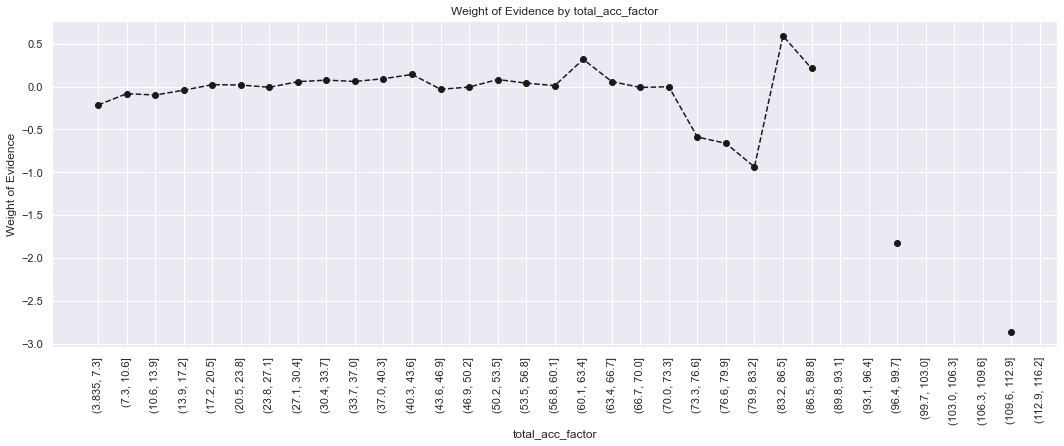

In [33]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
 
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)

plot_by_woe(df_temp, 90)

df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

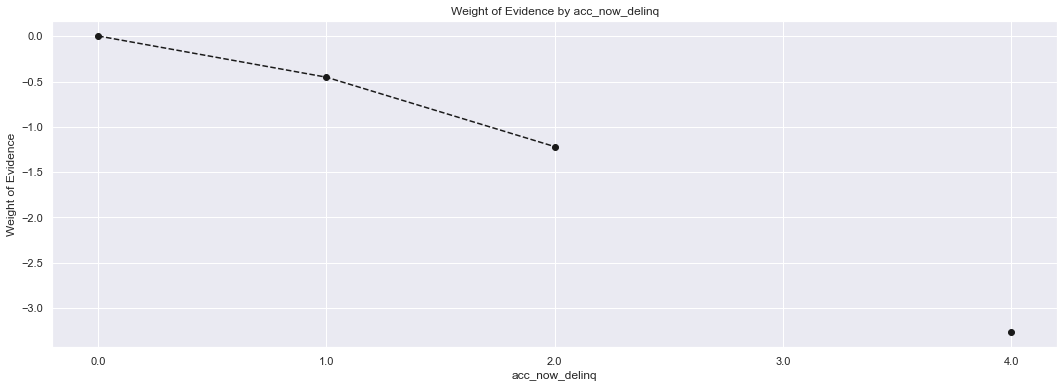

In [34]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)

plot_by_woe(df_temp)

df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

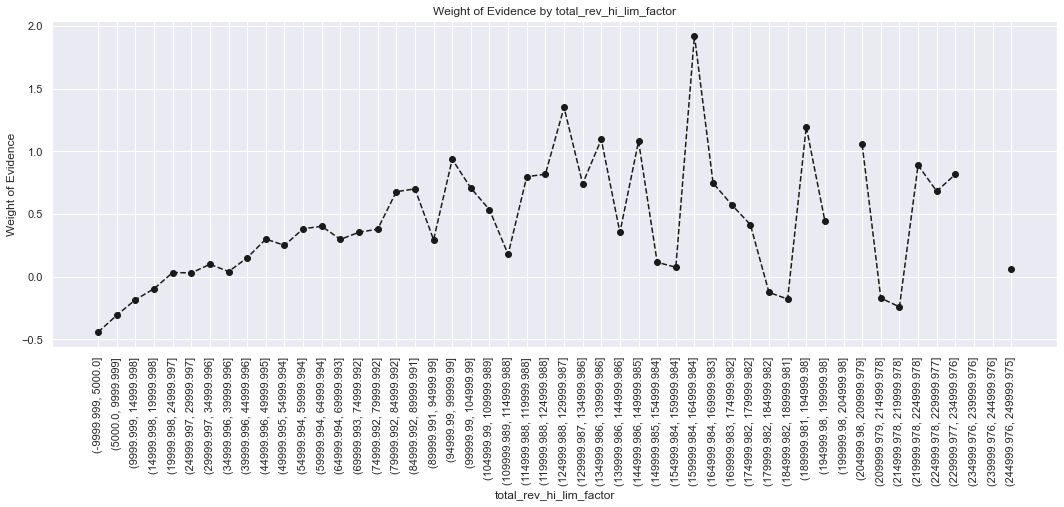

In [35]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)

plot_by_woe(df_temp.iloc[: 50, : ], 90)

df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

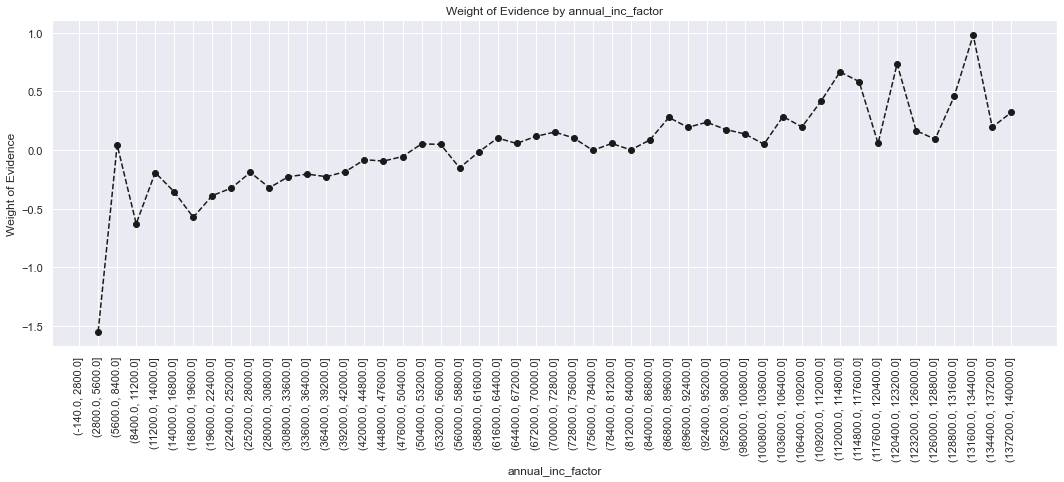

In [36]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
df_annual_inc = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, :]
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)

df_annual_lower140 = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])

plot_by_woe(df_annual_lower140, 90)


df_inputs_prepr['annual_inc:<20k'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc: 20k-30k'] = np.where((df_inputs_prepr['annual_inc'] > 20000)& (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc: 30k-40k'] = np.where((df_inputs_prepr['annual_inc'] > 30000)& (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc: 40k-50k'] = np.where((df_inputs_prepr['annual_inc'] > 40000)& (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc: 50k-60k'] = np.where((df_inputs_prepr['annual_inc'] > 50000)& (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc: 60k-70k'] = np.where((df_inputs_prepr['annual_inc'] > 60000)& (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc: 70k-80k'] = np.where((df_inputs_prepr['annual_inc'] > 70000)& (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc: 80k-90k'] = np.where((df_inputs_prepr['annual_inc'] > 80000)& (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc: 90k-100k'] = np.where((df_inputs_prepr['annual_inc'] > 90000)& (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc: 100k-120k'] = np.where((df_inputs_prepr['annual_inc'] > 100000)& (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc: 120k-140k'] = np.where((df_inputs_prepr['annual_inc'] > 120000)& (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140k'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

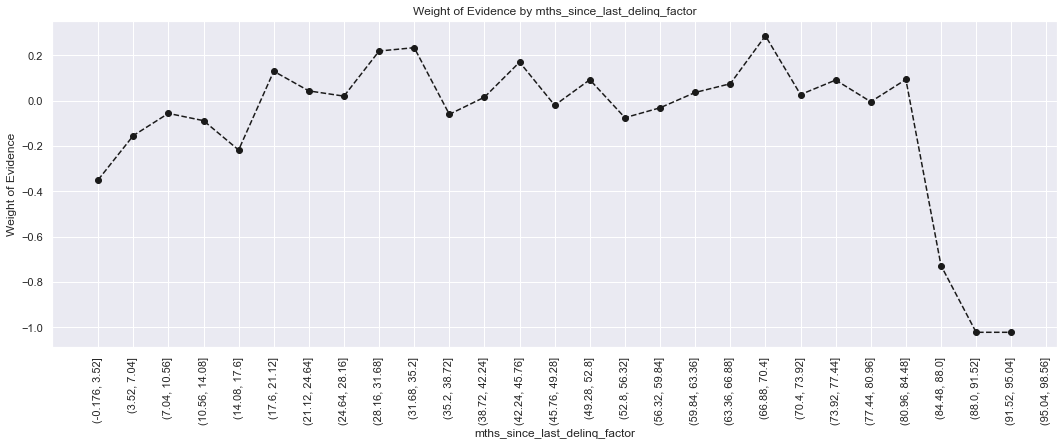

In [37]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_delinq_last = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])

plot_by_woe(df_delinq_last,90)

df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

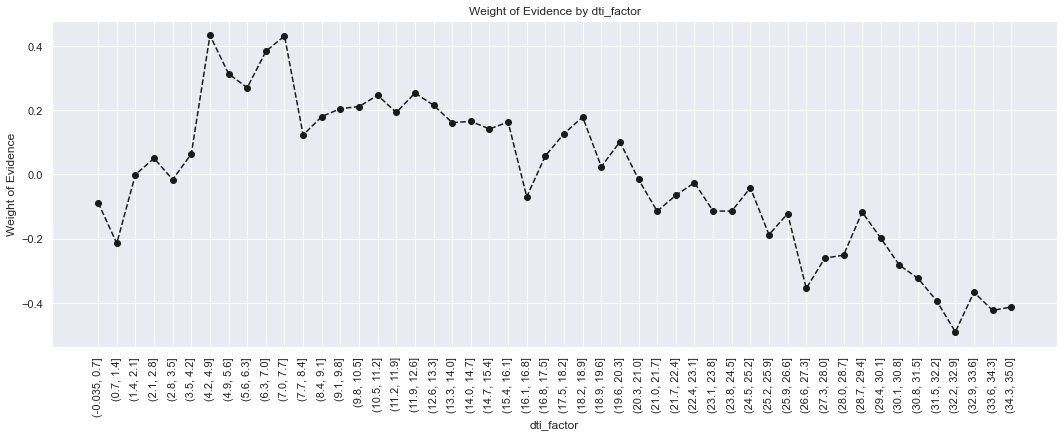

In [38]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_dti = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)

df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)

df_dti_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])

plot_by_woe(df_dti_temp, 90)

df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

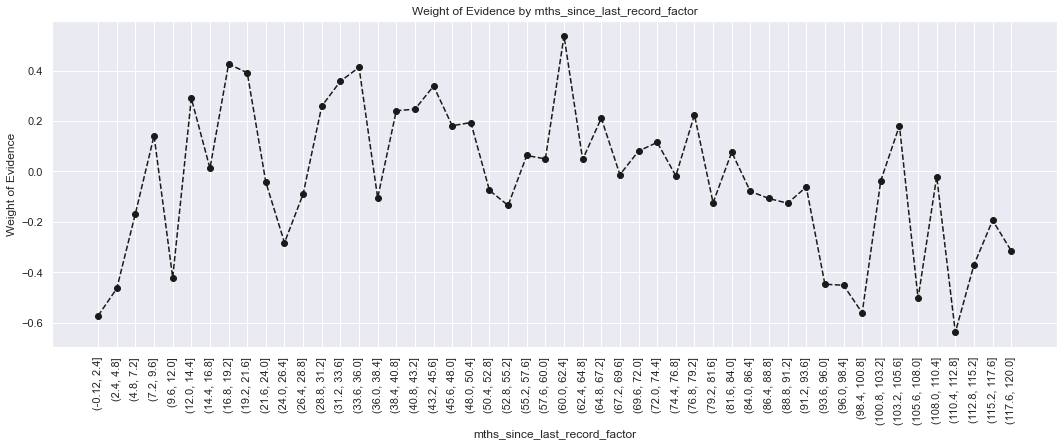

In [39]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
 
df_mths_since_last = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
 
plot_by_woe(df_mths_since_last, 90)

df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

### Preprocessing the Test Dataset

In [40]:
loan_data_inputs_2015 = df_inputs_prepr
loan_data_targets_2015 = df_targets_prepr

In [41]:
loan_data_inputs_2015.to_csv('loan_data_inputs_2015.csv')
loan_data_targets_2015.to_csv('loan_data_targets_2015.csv')

### >>> The code up to here, from the other line starting with '>>>' is copied from the Data Preparation notebook, with minor adjustments

In [42]:
inputs_train_with_ref_cat = pd.read_csv('inputs_train_with_ref_cat.csv', index_col = 0)

In [43]:
inputs_2015_with_ref_cat = loan_data_inputs_2015.loc[: ,[
    'grade:A',
    'grade:B',
    'grade:C',
    'grade:D',
    'grade:E',
    'grade:F',
    'grade:G',
    'home_ownership:RENT_OTHER_NONE_ANY',
    'home_ownership:OWN',
    'home_ownership:MORTGAGE',
    'addr_state:ND_NE_IA_NV_FL_HI_AL',
    'addr_state:NM_VA',
    'addr_state:NY',
    'addr_state:OK_TN_MO_LA_MD_NC',
    'addr_state:CA',
    'addr_state:UT_KY_AZ_NJ',
    'addr_state:AR_MI_PA_OH_MN',
    'addr_state:RI_MA_DE_SD_IN',
    'addr_state:GA_WA_OR',
    'addr_state:WI_MT',
    'addr_state:TX',
    'addr_state:IL_CT',
    'addr_state:KS_SC_CO_VT_AK_MS',
    'addr_state:WV_NH_WY_DC_ME_ID',
    'verification_status:Not Verified',
    'verification_status:Source Verified',
    'verification_status:Verified',
    'purpose:small_educ_moving',
    'purpose:house_other_renewable_medical',
    'purpose:wedding_vaca',
    'purpose:credit_card',
    'purpose:debt_consolidation',
    'purpose:improve_major_car',
    'initial_list_status:f',
    'initial_list_status:w',
    'term:36',
    'term:60',
    'emp_length:0',
    'emp_length:1',
    'emp_length:2-4',
    'emp_length:5-6',
    'emp_length:7-9',
    'emp_length:10+',
    'mnths_since_issue_d: < 38',
    'mnths_since_issue_d: 38~39',
    'mnths_since_issue_d: 40~41',
    'mnths_since_issue_d: 42~48',
    'mnths_since_issue_d: 49~52',
    'mnths_since_issue_d: 53~64',
    'mnths_since_issue_d: 65~84',
    'mnths_since_issue_d: > 84',
    'int_rate:<9.548',
    'int_rate:9.548-12.025',
    'int_rate:12.025-15.74',
    'int_rate:15.74-20.281',
    'int_rate:>20.281',
    'mnths_since_earliest_cr_line:<164.36',
    'mnths_since_earliest_cr_line:164.36-246.54',
    'mnths_since_earliest_cr_line:264.54-270.72',
    'mnths_since_earliest_cr_line:270.72-352.2',
    'mnths_since_earliest_cr_line:352.2-399.16',
    'mnths_since_earliest_cr_line:>399.16',
    'inq_last_6mths:0',
    'inq_last_6mths:1-2',
    'inq_last_6mths:3-6',
    'inq_last_6mths:>6',
    'acc_now_delinq:0',
    'acc_now_delinq:>=1',
    'annual_inc:<20k',
    'annual_inc: 20k-30k',
    'annual_inc: 30k-40k',
    'annual_inc: 40k-50k',
    'annual_inc: 50k-60k',
    'annual_inc: 60k-70k',
    'annual_inc: 70k-80k',
    'annual_inc: 80k-90k',
    'annual_inc: 90k-100k',
    'annual_inc: 100k-120k',
    'annual_inc: 120k-140k',
    'annual_inc:>140k',
    'dti:<=1.4',
    'dti:1.4-3.5',
    'dti:3.5-7.7',
    'dti:7.7-10.5',
    'dti:10.5-16.1',
    'dti:16.1-20.3',
    'dti:20.3-21.7',
    'dti:21.7-22.4',
    'dti:22.4-35',
    'dti:>35',
    'mths_since_last_delinq:Missing',
    'mths_since_last_delinq:0-3',
    'mths_since_last_delinq:4-30',
    'mths_since_last_delinq:31-56',
    'mths_since_last_delinq:>=57',
    'mths_since_last_record:Missing',
    'mths_since_last_record:0-2',
    'mths_since_last_record:3-20',
    'mths_since_last_record:21-31',
    'mths_since_last_record:32-80',
    'mths_since_last_record:81-86',
    'mths_since_last_record:>86'
]]

In [44]:
df_scorecard = pd.read_csv('df_scorecard.csv', index_col = 0)
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-1.460291,NaN,Intercept,313.781218,314.0,0.218782,314.0
1,1,grade:A,1.122070,3.876277e-35,grade,83.225187,83.0,-0.225187,83.0
2,2,grade:B,0.873111,2.034091e-46,grade,64.759590,65.0,0.240410,65.0
3,3,grade:C,0.676501,4.661873e-33,grade,50.176813,50.0,-0.176813,50.0
4,4,grade:D,0.485834,1.029578e-19,grade,36.034849,36.0,-0.034849,36.0
...,...,...,...,...,...,...,...,...,...
98,12,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.0
99,13,annual_inc:<20k,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.0
100,14,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.0
101,15,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.0


In [45]:
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat
inputs_train_with_ref_cat_w_intercept.insert(0,'Intercept', 1)
inputs_train_with_ref_cat_w_intercept = inputs_train_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

inputs_train_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:house_other_renewable_medical,purpose:wedding_vaca,purpose:credit_card,purpose:debt_consolidation,purpose:improve_major_car,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10+,mnths_since_issue_d: < 38,mnths_since_issue_d: 38~39,mnths_since_issue_d: 40~41,mnths_since_issue_d: 42~48,mnths_since_issue_d: 49~52,mnths_since_issue_d: 53~64,mnths_since_issue_d: 65~84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:164.36-246.54,mnths_since_earliest_cr_line:264.54-270.72,mnths_since_earliest_cr_line:270.72-352.2,mnths_since_earliest_cr_line:352.2-399.16,mnths_since_earliest_cr_line:>399.16,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc: 20k-30k,annual_inc: 30k-40k,annual_inc: 40k-50k,annual_inc: 50k-60k,annual_inc: 60k-70k,annual_inc: 70k-80k,annual_inc: 80k-90k,annual_inc: 90k-100k,annual_inc: 100k-120k,annual_inc: 120k-140k,annual_inc:>140k,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:small_educ_moving,initial_list_status:f,term:60,emp_length:0,mnths_since_issue_d: > 84,int_rate:>20.281,mnths_since_earliest_cr_line:<164.36,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
427211,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
206088,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
136020,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
412305,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
36159,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0


In [46]:
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat
inputs_2015_with_ref_cat_w_intercept.insert(0,'Intercept', 1)
inputs_2015_with_ref_cat_w_intercept = inputs_2015_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]

inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:house_other_renewable_medical,purpose:wedding_vaca,purpose:credit_card,purpose:debt_consolidation,purpose:improve_major_car,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10+,mnths_since_issue_d: < 38,mnths_since_issue_d: 38~39,mnths_since_issue_d: 40~41,mnths_since_issue_d: 42~48,mnths_since_issue_d: 49~52,mnths_since_issue_d: 53~64,mnths_since_issue_d: 65~84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:164.36-246.54,mnths_since_earliest_cr_line:264.54-270.72,mnths_since_earliest_cr_line:270.72-352.2,mnths_since_earliest_cr_line:352.2-399.16,mnths_since_earliest_cr_line:>399.16,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc: 20k-30k,annual_inc: 30k-40k,annual_inc: 40k-50k,annual_inc: 50k-60k,annual_inc: 60k-70k,annual_inc: 70k-80k,annual_inc: 80k-90k,annual_inc: 90k-100k,annual_inc: 100k-120k,annual_inc: 120k-140k,annual_inc:>140k,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:small_educ_moving,initial_list_status:f,term:60,emp_length:0,mnths_since_issue_d: > 84,int_rate:>20.281,mnths_since_earliest_cr_line:<164.36,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [47]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores = scorecard_scores.values.reshape(103,1)

In [48]:
# Original Score from Original Train Data

y_scores_train = inputs_train_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_train.head()

,0
427211,683.0
206088,591.0
136020,665.0
412305,522.0
36159,514.0


In [49]:
# 2015 Score from 2015 New data

y_scores_2015 = inputs_2015_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores_2015.head()

,0
0,737.0
1,744.0
2,631.0
3,616.0
4,691.0


In [50]:
inputs_train_with_ref_cat_w_intercept = pd.concat([inputs_train_with_ref_cat_w_intercept,y_scores_train], axis = 1)
inputs_2015_with_ref_cat_w_intercept = pd.concat([inputs_2015_with_ref_cat_w_intercept,y_scores_2015], axis = 1)

In [51]:
inputs_train_with_ref_cat_w_intercept.columns.values[inputs_train_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'
inputs_2015_with_ref_cat_w_intercept.columns.values[inputs_2015_with_ref_cat_w_intercept.shape[1] - 1] = 'Score'

In [52]:
# We can see Credit score in most right column

inputs_2015_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,addr_state:OK_TN_MO_LA_MD_NC,addr_state:CA,addr_state:UT_KY_AZ_NJ,addr_state:AR_MI_PA_OH_MN,addr_state:RI_MA_DE_SD_IN,addr_state:GA_WA_OR,addr_state:WI_MT,addr_state:TX,addr_state:IL_CT,addr_state:KS_SC_CO_VT_AK_MS,addr_state:WV_NH_WY_DC_ME_ID,verification_status:Not Verified,verification_status:Source Verified,purpose:house_other_renewable_medical,purpose:wedding_vaca,purpose:credit_card,purpose:debt_consolidation,purpose:improve_major_car,initial_list_status:w,term:36,emp_length:1,emp_length:2-4,emp_length:5-6,emp_length:7-9,emp_length:10+,mnths_since_issue_d: < 38,mnths_since_issue_d: 38~39,mnths_since_issue_d: 40~41,mnths_since_issue_d: 42~48,mnths_since_issue_d: 49~52,mnths_since_issue_d: 53~64,mnths_since_issue_d: 65~84,int_rate:<9.548,int_rate:9.548-12.025,int_rate:12.025-15.74,int_rate:15.74-20.281,mnths_since_earliest_cr_line:164.36-246.54,mnths_since_earliest_cr_line:264.54-270.72,mnths_since_earliest_cr_line:270.72-352.2,mnths_since_earliest_cr_line:352.2-399.16,mnths_since_earliest_cr_line:>399.16,inq_last_6mths:0,inq_last_6mths:1-2,inq_last_6mths:3-6,acc_now_delinq:>=1,annual_inc: 20k-30k,annual_inc: 30k-40k,annual_inc: 40k-50k,annual_inc: 50k-60k,annual_inc: 60k-70k,annual_inc: 70k-80k,annual_inc: 80k-90k,annual_inc: 90k-100k,annual_inc: 100k-120k,annual_inc: 120k-140k,annual_inc:>140k,dti:<=1.4,dti:1.4-3.5,dti:3.5-7.7,dti:7.7-10.5,dti:10.5-16.1,dti:16.1-20.3,dti:20.3-21.7,dti:21.7-22.4,dti:22.4-35,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86,grade:G,home_ownership:RENT_OTHER_NONE_ANY,addr_state:ND_NE_IA_NV_FL_HI_AL,verification_status:Verified,purpose:small_educ_moving,initial_list_status:f,term:60,emp_length:0,mnths_since_issue_d: > 84,int_rate:>20.281,mnths_since_earliest_cr_line:<164.36,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20k,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2,Score
0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,737.0
1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,744.0
2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,631.0
3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,616.0
4,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,691.0


In [53]:
# change the score scope to 300~850
inputs_train_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_train_with_ref_cat_w_intercept['Score'] < 350),1,0)
inputs_train_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_train_with_ref_cat_w_intercept['Score'] < 400),1,0)
inputs_train_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_train_with_ref_cat_w_intercept['Score'] < 450),1,0)
inputs_train_with_ref_cat_w_intercept['Score:450-400'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_train_with_ref_cat_w_intercept['Score'] < 500),1,0)
inputs_train_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_train_with_ref_cat_w_intercept['Score'] < 550),1,0)
inputs_train_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_train_with_ref_cat_w_intercept['Score'] < 600),1,0)
inputs_train_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_train_with_ref_cat_w_intercept['Score'] < 650),1,0)
inputs_train_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_train_with_ref_cat_w_intercept['Score'] < 700),1,0)
inputs_train_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_train_with_ref_cat_w_intercept['Score'] < 750),1,0)
inputs_train_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_train_with_ref_cat_w_intercept['Score'] < 800),1,0)
inputs_train_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_train_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_train_with_ref_cat_w_intercept['Score'] < 850),1,0)


In [54]:
# do the same to 2015 data as well
inputs_2015_with_ref_cat_w_intercept['Score:300-350'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 300) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 350),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:350-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 350) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 400),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:400-450'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 400) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 450),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:450-400'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 450) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 500),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:500-550'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 500) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 550),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:550-600'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 550) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 600),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:600-650'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 600) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 650),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:650-700'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 650) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 700),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:700-750'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 700) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 750),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:750-800'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 750) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 800),1,0)
inputs_2015_with_ref_cat_w_intercept['Score:800-850'] = np.where((inputs_2015_with_ref_cat_w_intercept['Score'] >= 800) & (inputs_2015_with_ref_cat_w_intercept['Score'] < 850),1,0)

# Population Stability Index: Calculation and Interpretation

In [55]:
PSI_calc_train = inputs_train_with_ref_cat_w_intercept.sum() / inputs_train_with_ref_cat_w_intercept.shape[0]
PSI_calc_2015 = inputs_2015_with_ref_cat_w_intercept.sum() / inputs_2015_with_ref_cat_w_intercept.shape[0]

In [56]:
PSI_calc = pd.concat([PSI_calc_train, PSI_calc_2015], axis = 1)
PSI_calc = PSI_calc.reset_index()
PSI_calc['Original feature name'] = PSI_calc['index'].str.split(':').str[0]
PSI_calc.columns = ['index', 'Proportions_Train', 'Proportions_New', 'Original feature name']

In [57]:
pd.options.display.max_rows = None

PSI_calc = PSI_calc[np.array(['index', 'Original feature name', 'Proportions_Train', 'Proportions_New'])]
PSI_calc = PSI_calc[(PSI_calc['index'] != 'Intercept') & (PSI_calc['index'] != 'Score')]
PSI_calc['Contribution'] = np.where((PSI_calc['Proportions_Train'] == 0) | (PSI_calc['Proportions_New'] == 0), 0,
                                    (PSI_calc['Proportions_New'] - PSI_calc['Proportions_Train']) * np.log(PSI_calc['Proportions_New'] / PSI_calc['Proportions_Train']))
# Overwrite PSI_calc['Contribution'] to be 0, if either of the proportion is equal to 0

PSI_calc

,index,Original feature name,Proportions_Train,Proportions_New,Contribution
1,grade:A,grade,0.160200,0.174154,1.165355e-03
2,grade:B,grade,0.294160,0.279287,7.717123e-04
3,grade:C,grade,0.268733,0.286318,1.114660e-03
4,grade:D,grade,0.164862,0.148789,1.648763e-03
5,grade:E,grade,0.076702,0.082993,4.959607e-04
6,grade:F,grade,0.028228,0.023313,9.403837e-04
7,home_ownership:OWN,home_ownership,0.089256,0.108684,3.825896e-03
8,home_ownership:MORTGAGE,home_ownership,0.506546,0.493196,3.565650e-04
9,addr_state:NM_VA,addr_state,0.036032,0.034159,1.000374e-04
10,addr_state:NY,addr_state,0.086350,0.080372,4.289495e-04


In [58]:
# Now sum all features

PSI_calc.groupby('Original feature name')['Contribution'].sum()

Original feature name
Score                           0.977740
acc_now_delinq                  0.000925
addr_state                      0.003837
annual_inc                      0.005445
dti                             0.078143
emp_length                      0.007619
grade                           0.006775
home_ownership                  0.004275
initial_list_status             0.333717
inq_last_6mths                  0.046465
int_rate                        0.079230
mnths_since_earliest_cr_line    0.030390
mnths_since_issue_d             2.388305
mths_since_last_delinq          0.011594
mths_since_last_record          0.056276
purpose                         0.009948
term                            0.013099
verification_status             0.048219
Name: Contribution, dtype: float64

PSI = 0               No difference
PSI < 0.1             Little to No difference
0.1 < PSI < 0.25      Little difference (No action taken)
0.25 < PSI            Big difference (Action is taken)
PSI = 1               ABSOLUTE DIFFERENCE


Initial_list_status : New applicants differ substantially from original population.


mths_since_issue_d : This is above 1! Probably due to categorizing issue. It require additional investigation


Score is different sky high. 

Indicating we must train the whole model again by including the new population in the training dataset. 

2015 data definitely requires new investigation and adjustment to the current model.

In [59]:
import cowsay

cowsay.pig('Lets go to P4, for the adjustments and final result calculation!')

  _________________________________________________
 /                                                 \
| Lets go to P4, for the adjustments and final resu |
| lt calculation!                                   |
 \                                                 /
                                                 \
                                                  \
                                                   \
                                                    \
                                                              ,.
                                                             (_|,.
                                                             ,' /, )_______   _
                                                         __j o``-'        `.'-)'
                                                         (")                 \'
                                                         `-j                |
                                                           `-._(         